# Wall Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Retau = 295
delta = 2e-3
nu = 1e-6
utau = Retau*nu/delta

yPlus = np.linspace(1e-12,Retau,1000)
y = yPlus / Retau * delta

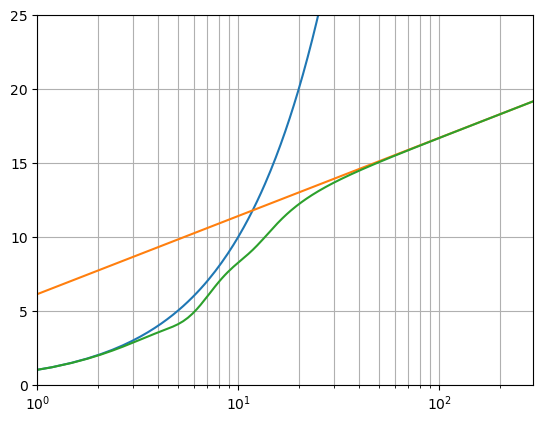

In [3]:
uLamPlus = yPlus
# channel
kappa = 0.41
B = 5.2
# pipe
kappa = 0.436
B = 6.13
uTurbPlus = np.log(yPlus) / kappa + B

# Enhanced Wall Functions
# https://www.afs.enea.it/project/neptunius/docs/fluent/html/th/node101.htm
a = 0.01
b = 5
Gamma = - a * yPlus**4 / (1 + b*yPlus)
Gmmma = 0
uPlus = np.exp(Gamma)*uLamPlus + np.exp(Gamma**-1)*uTurbPlus

plt.figure()
plt.plot(yPlus, uLamPlus)
plt.plot(yPlus, uTurbPlus)
plt.plot(yPlus, uPlus)
# plt.plot(yPlus, Gamma)
plt.xscale('log')
plt.xlim(1,Retau)
plt.ylim(0,25)
plt.grid()
plt.grid(which="minor")

In [4]:
u = uPlus * utau
u.max()

2.8280392979716003

In [5]:
dy = np.diff(y)
dS = 2*np.pi * (y[:-1]+y[1:])/2 * dy
S = np.sum(dS)
Q = np.sum(dS * (u[:-1]+u[1:])/2 )
print(S, Q)
print(Q*60*1e3)
umean = Q / S
print(umean)

1.2566370614359173e-05 3.337810572868033e-05
2.00268634372082
2.656145258881692
